In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

C:\Users\Administrator\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Open train and test Data

In [2]:
house_train = pd.read_csv('train.csv', usecols = ['LotFrontage','LotArea','Neighborhood','OverallQual','OverallCond',
                                                  'ExterQual','ExterCond','TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFullBath',
                                                  'FullBath','GarageArea','SalePrice','GrLivArea','YearBuilt','YearRemodAdd',
                                                 'Fireplaces','OpenPorchSF','WoodDeckSF'])
house_train

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,CollgCr,7,5,2003,2003,Gd,TA,856,856,854,1710,1,2,0,548,0,61,208500
1,80.0,9600,Veenker,6,8,1976,1976,TA,TA,1262,1262,0,1262,0,2,1,460,298,0,181500
2,68.0,11250,CollgCr,7,5,2001,2002,Gd,TA,920,920,866,1786,1,2,1,608,0,42,223500
3,60.0,9550,Crawfor,7,5,1915,1970,TA,TA,756,961,756,1717,1,1,1,642,0,35,140000
4,84.0,14260,NoRidge,8,5,2000,2000,Gd,TA,1145,1145,1053,2198,1,2,1,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,Gilbert,6,5,1999,2000,TA,TA,953,953,694,1647,0,2,1,460,0,40,175000
1456,85.0,13175,NWAmes,6,6,1978,1988,TA,TA,1542,2073,0,2073,1,2,2,500,349,0,210000
1457,66.0,9042,Crawfor,7,9,1941,2006,Ex,Gd,1152,1188,1152,2340,0,2,2,252,0,60,266500
1458,68.0,9717,NAmes,5,6,1950,1996,TA,TA,1078,1078,0,1078,1,1,0,240,366,0,142125


In [3]:
house_test = pd.read_csv('test.csv', usecols = ['LotFrontage','LotArea','Neighborhood','OverallQual','OverallCond',
                                                  'ExterQual','ExterCond','TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFullBath',
                                                  'FullBath','GarageArea','GrLivArea','YearBuilt','YearRemodAdd','Fireplaces',
                                                'OpenPorchSF','WoodDeckSF'])
house_test

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF
0,80.0,11622,NAmes,5,6,1961,1961,TA,TA,882.0,896,0,896,0.0,1,0,730.0,140,0
1,81.0,14267,NAmes,6,6,1958,1958,TA,TA,1329.0,1329,0,1329,0.0,1,0,312.0,393,36
2,74.0,13830,Gilbert,5,5,1997,1998,TA,TA,928.0,928,701,1629,0.0,2,1,482.0,212,34
3,78.0,9978,Gilbert,6,6,1998,1998,TA,TA,926.0,926,678,1604,0.0,2,1,470.0,360,36
4,43.0,5005,StoneBr,8,5,1992,1992,Gd,TA,1280.0,1280,0,1280,0.0,2,0,506.0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,MeadowV,4,7,1970,1970,TA,TA,546.0,546,546,1092,0.0,1,0,0.0,0,0
1455,21.0,1894,MeadowV,4,5,1970,1970,TA,TA,546.0,546,546,1092,0.0,1,0,286.0,0,24
1456,160.0,20000,Mitchel,5,7,1960,1996,TA,TA,1224.0,1224,0,1224,1.0,1,1,576.0,474,0
1457,62.0,10441,Mitchel,5,5,1992,1992,TA,TA,912.0,970,0,970,0.0,1,0,0.0,80,32


In [4]:
house_test.fillna(0,inplace=True)

In [5]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1459 non-null   float64
 1   LotArea       1459 non-null   int64  
 2   Neighborhood  1459 non-null   object 
 3   OverallQual   1459 non-null   int64  
 4   OverallCond   1459 non-null   int64  
 5   YearBuilt     1459 non-null   int64  
 6   YearRemodAdd  1459 non-null   int64  
 7   ExterQual     1459 non-null   object 
 8   ExterCond     1459 non-null   object 
 9   TotalBsmtSF   1459 non-null   float64
 10  1stFlrSF      1459 non-null   int64  
 11  2ndFlrSF      1459 non-null   int64  
 12  GrLivArea     1459 non-null   int64  
 13  BsmtFullBath  1459 non-null   float64
 14  FullBath      1459 non-null   int64  
 15  Fireplaces    1459 non-null   int64  
 16  GarageArea    1459 non-null   float64
 17  WoodDeckSF    1459 non-null   int64  
 18  OpenPorchSF   1459 non-null 

# Clean data

In [6]:
house_train = house_train.dropna(how='any',axis=0)
house_train

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,CollgCr,7,5,2003,2003,Gd,TA,856,856,854,1710,1,2,0,548,0,61,208500
1,80.0,9600,Veenker,6,8,1976,1976,TA,TA,1262,1262,0,1262,0,2,1,460,298,0,181500
2,68.0,11250,CollgCr,7,5,2001,2002,Gd,TA,920,920,866,1786,1,2,1,608,0,42,223500
3,60.0,9550,Crawfor,7,5,1915,1970,TA,TA,756,961,756,1717,1,1,1,642,0,35,140000
4,84.0,14260,NoRidge,8,5,2000,2000,Gd,TA,1145,1145,1053,2198,1,2,1,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,Gilbert,6,5,1999,2000,TA,TA,953,953,694,1647,0,2,1,460,0,40,175000
1456,85.0,13175,NWAmes,6,6,1978,1988,TA,TA,1542,2073,0,2073,1,2,2,500,349,0,210000
1457,66.0,9042,Crawfor,7,9,1941,2006,Ex,Gd,1152,1188,1152,2340,0,2,2,252,0,60,266500
1458,68.0,9717,NAmes,5,6,1950,1996,TA,TA,1078,1078,0,1078,1,1,0,240,366,0,142125


In [7]:
house_test = house_test.dropna(how='any',axis=0)
house_test

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF
0,80.0,11622,NAmes,5,6,1961,1961,TA,TA,882.0,896,0,896,0.0,1,0,730.0,140,0
1,81.0,14267,NAmes,6,6,1958,1958,TA,TA,1329.0,1329,0,1329,0.0,1,0,312.0,393,36
2,74.0,13830,Gilbert,5,5,1997,1998,TA,TA,928.0,928,701,1629,0.0,2,1,482.0,212,34
3,78.0,9978,Gilbert,6,6,1998,1998,TA,TA,926.0,926,678,1604,0.0,2,1,470.0,360,36
4,43.0,5005,StoneBr,8,5,1992,1992,Gd,TA,1280.0,1280,0,1280,0.0,2,0,506.0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,MeadowV,4,7,1970,1970,TA,TA,546.0,546,546,1092,0.0,1,0,0.0,0,0
1455,21.0,1894,MeadowV,4,5,1970,1970,TA,TA,546.0,546,546,1092,0.0,1,0,286.0,0,24
1456,160.0,20000,Mitchel,5,7,1960,1996,TA,TA,1224.0,1224,0,1224,1.0,1,1,576.0,474,0
1457,62.0,10441,Mitchel,5,5,1992,1992,TA,TA,912.0,970,0,970,0.0,1,0,0.0,80,32


In [8]:
house_train = house_train[house_train['SalePrice']<400000]

In [9]:
for i in house_train.columns:
    if house_train[i].dtype == 'object':
        print(f"Coluna: ", i,"--  Quantidade: ",house_train[i].nunique(), "Tipo coluna: ",house_train[i].dtype)

Coluna:  Neighborhood --  Quantidade:  25 Tipo coluna:  object
Coluna:  ExterQual --  Quantidade:  4 Tipo coluna:  object
Coluna:  ExterCond --  Quantidade:  5 Tipo coluna:  object


In [10]:
for i in house_test.columns:
    if house_test[i].dtype == 'object':
        print(f"Coluna: ", i,"--  Quantidade: ",house_test[i].nunique(), "Tipo coluna: ",house_train[i].dtype)

Coluna:  Neighborhood --  Quantidade:  25 Tipo coluna:  object
Coluna:  ExterQual --  Quantidade:  4 Tipo coluna:  object
Coluna:  ExterCond --  Quantidade:  5 Tipo coluna:  object


# Get Dummies

In [11]:
house_train = pd.get_dummies(house_train,drop_first=True)
house_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,65.0,8450,7,5,2003,2003,856,856,854,1710,...,0,0,0,0,1,0,0,0,0,1
1,80.0,9600,6,8,1976,1976,1262,1262,0,1262,...,0,0,1,0,0,1,0,0,0,1
2,68.0,11250,7,5,2001,2002,920,920,866,1786,...,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,7,5,1915,1970,756,961,756,1717,...,0,0,0,0,0,1,0,0,0,1
4,84.0,14260,8,5,2000,2000,1145,1145,1053,2198,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,953,953,694,1647,...,0,0,0,0,0,1,0,0,0,1
1456,85.0,13175,6,6,1978,1988,1542,2073,0,2073,...,0,0,0,0,0,1,0,0,0,1
1457,66.0,9042,7,9,1941,2006,1152,1188,1152,2340,...,0,0,0,0,0,0,0,1,0,0
1458,68.0,9717,5,6,1950,1996,1078,1078,0,1078,...,0,0,0,0,0,1,0,0,0,1


In [12]:
house_test = pd.get_dummies(house_test,drop_first=True)
house_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,80.0,11622,5,6,1961,1961,882.0,896,0,896,...,0,0,0,0,0,1,0,0,0,1
1,81.0,14267,6,6,1958,1958,1329.0,1329,0,1329,...,0,0,0,0,0,1,0,0,0,1
2,74.0,13830,5,5,1997,1998,928.0,928,701,1629,...,0,0,0,0,0,1,0,0,0,1
3,78.0,9978,6,6,1998,1998,926.0,926,678,1604,...,0,0,0,0,0,1,0,0,0,1
4,43.0,5005,8,5,1992,1992,1280.0,1280,0,1280,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,546.0,546,546,1092,...,0,0,0,0,0,1,0,0,0,1
1455,21.0,1894,4,5,1970,1970,546.0,546,546,1092,...,0,0,0,0,0,1,0,0,0,1
1456,160.0,20000,5,7,1960,1996,1224.0,1224,0,1224,...,0,0,0,0,0,1,0,0,0,1
1457,62.0,10441,5,5,1992,1992,912.0,970,0,970,...,0,0,0,0,0,1,0,0,0,1


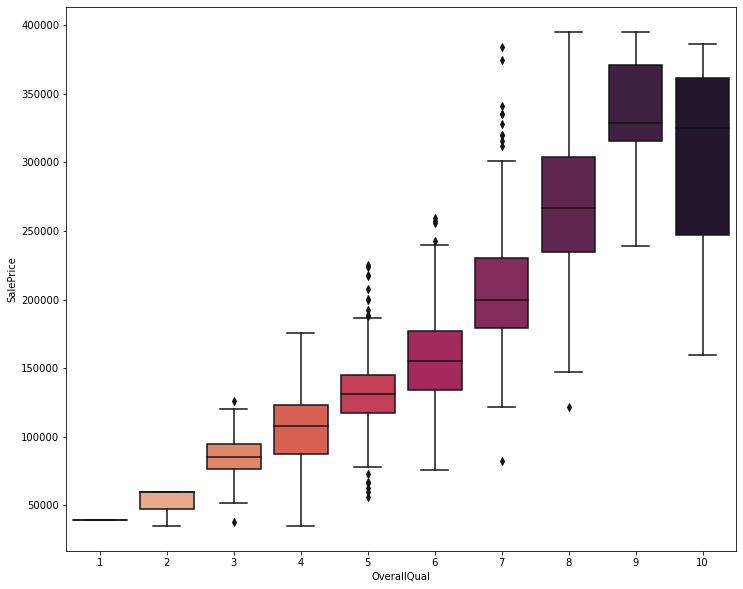

In [13]:
plt.subplots(figsize=(12,10))
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=house_train, palette="rocket_r")

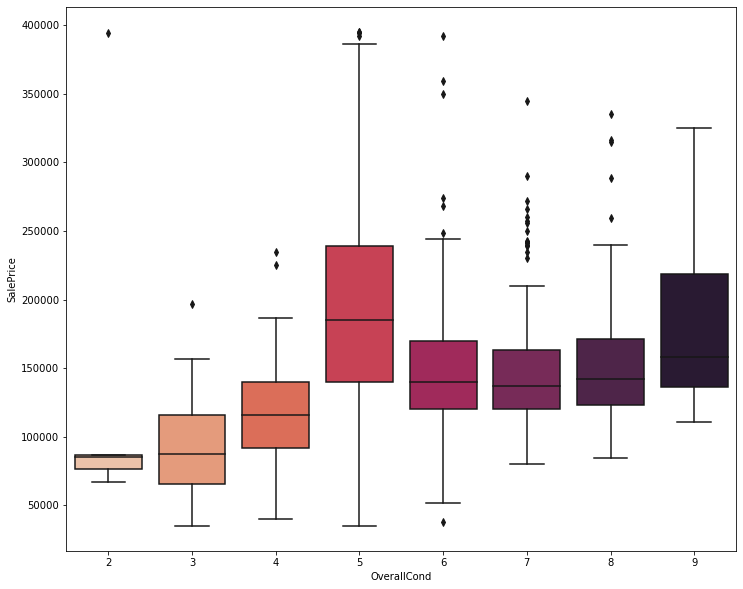

In [14]:
plt.subplots(figsize=(12,10))
ax = sns.boxplot(x="OverallCond", y="SalePrice", data=house_train, palette="rocket_r")

# Machine Learning - Separate columns X,Y and training by using LinearRegression and RandomForestRegressor 

In [15]:
from sklearn.model_selection import train_test_split

y = house_train["SalePrice"]
x = house_train.drop("SalePrice", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_train,y_train)
modelo_arvoredecisao.fit(x_train,y_train)

RandomForestRegressor()

In [17]:
# Features importantes obtidas por árvore de decisão
tamanho = len(house_test.columns)
colunas_importantes = pd.DataFrame(modelo_arvoredecisao.feature_importances_.reshape(1,tamanho), columns=x_train.columns)

print('percentual total ',np.sum(modelo_arvoredecisao.feature_importances_))

print(np.max(colunas_importantes).sort_values(ascending=False))

percentual total  1.0
OverallQual             0.605894
GrLivArea               0.107838
TotalBsmtSF             0.052328
GarageArea              0.045607
1stFlrSF                0.029367
LotArea                 0.026440
YearBuilt               0.024402
LotFrontage             0.018507
YearRemodAdd            0.018413
2ndFlrSF                0.011267
Fireplaces              0.010286
WoodDeckSF              0.008437
OverallCond             0.006972
OpenPorchSF             0.006954
BsmtFullBath            0.006030
FullBath                0.003454
Neighborhood_Crawfor    0.002020
Neighborhood_StoneBr    0.001657
Neighborhood_OldTown    0.001637
Neighborhood_Somerst    0.001469
Neighborhood_CollgCr    0.001428
Neighborhood_NridgHt    0.001376
ExterQual_Gd            0.001364
Neighborhood_Edwards    0.001087
ExterQual_TA            0.000992
ExterCond_TA            0.000681
Neighborhood_NAmes      0.000506
ExterCond_Gd            0.000445
Neighborhood_Mitchel    0.000423
Neighborhood_Timber  

# IA test and best model avaliation 
Using R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [18]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_test)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_test)

from sklearn.metrics import r2_score

print(r2_score(y_test, previsao_regressaolinear))
print(r2_score(y_test, previsao_arvoredecisao))

0.8492395155925958
0.8808949185258917


In [19]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print('Variancia explicada: ', explained_variance_score(y_test, previsao_arvoredecisao))
print('Erro maximo residual: ', max_error(y_test, previsao_arvoredecisao))
print('Erro Medio Absoluto (MAE): ', mean_absolute_error(y_test, previsao_arvoredecisao))
print('Erro Mediana Absoluto : ', median_absolute_error(y_test, previsao_arvoredecisao))
print('Erro medio quadrado log : ', mean_squared_log_error(y_test, previsao_arvoredecisao))
print('R Quadrado : ', r2_score(y_test, previsao_arvoredecisao))
print('RMSE: ', (np.sqrt(mean_squared_error(y_test, previsao_arvoredecisao))))

Variancia explicada:  0.880895326662055
Erro maximo residual:  128948.28000000003
Erro Medio Absoluto (MAE):  16584.159348441928
Erro Mediana Absoluto :  10779.869999999995
Erro medio quadrado log :  0.02547932661189827
R Quadrado :  0.8808949185258917
RMSE:  23934.164033679597


# Visualização Gráfica das Previsões

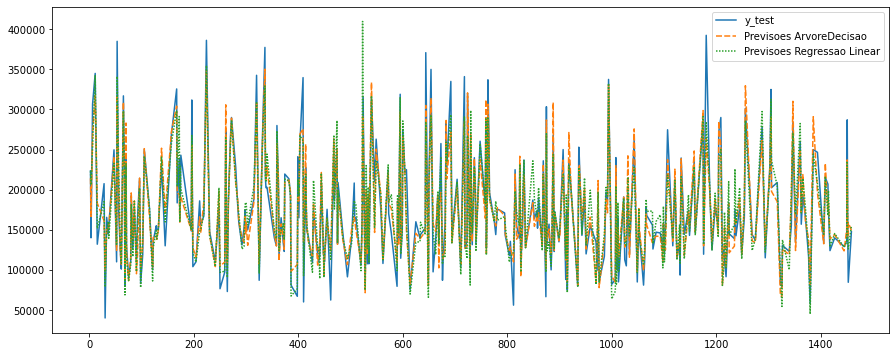

In [20]:
tabela_auxiliar = pd.DataFrame() #cria um novo data frame
tabela_auxiliar["y_test"] = y_test
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))#aumenta o tamanho do grafico
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [21]:
tabela_auxiliar

,y_test,Previsoes ArvoreDecisao,Previsoes Regressao Linear
818,155000,138228.00,172115.763225
528,86000,71486.72,74728.488956
241,110500,104030.00,104299.737642
260,176000,164279.00,175287.906400
914,173733,151637.00,178331.978172
...,...,...,...
1061,81000,98913.03,105978.905224
935,79900,80356.80,78450.012756
857,174000,166133.37,165940.797101
1305,325000,292501.55,312666.377471


# Test the house_test dataset by using RandomForestRegressor

In [22]:
house_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,80.0,11622,5,6,1961,1961,882.0,896,0,896,...,0,0,0,0,0,1,0,0,0,1
1,81.0,14267,6,6,1958,1958,1329.0,1329,0,1329,...,0,0,0,0,0,1,0,0,0,1
2,74.0,13830,5,5,1997,1998,928.0,928,701,1629,...,0,0,0,0,0,1,0,0,0,1
3,78.0,9978,6,6,1998,1998,926.0,926,678,1604,...,0,0,0,0,0,1,0,0,0,1
4,43.0,5005,8,5,1992,1992,1280.0,1280,0,1280,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,546.0,546,546,1092,...,0,0,0,0,0,1,0,0,0,1
1455,21.0,1894,4,5,1970,1970,546.0,546,546,1092,...,0,0,0,0,0,1,0,0,0,1
1456,160.0,20000,5,7,1960,1996,1224.0,1224,0,1224,...,0,0,0,0,0,1,0,0,0,1
1457,62.0,10441,5,5,1992,1992,912.0,970,0,970,...,0,0,0,0,0,1,0,0,0,1


In [23]:
previsao = modelo_regressaolinear.predict(house_test)

In [24]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [25]:
print('Variancia explicada: ', explained_variance_score(sample_sub['SalePrice'], previsao))
print('Erro maximo residual: ', max_error(sample_sub['SalePrice'], previsao))
print('Erro Medio Absoluto (MAE): ', mean_absolute_error(sample_sub['SalePrice'], previsao))
print('Erro Mediana Absoluto : ', median_absolute_error(sample_sub['SalePrice'], previsao))
print('Erro medio quadrado log : ', mean_squared_log_error(sample_sub['SalePrice'], previsao))
print('R Quadrado : ', r2_score(sample_sub['SalePrice'], previsao))
print('RMSE: ', (np.sqrt(mean_squared_error(sample_sub['SalePrice'], previsao))))

Variancia explicada:  -14.076415171228525
Erro maximo residual:  231756.30344947084
Erro Medio Absoluto (MAE):  51763.329526593196
Erro Mediana Absoluto :  43484.12467668476
Erro medio quadrado log :  0.14907451429841137
R Quadrado :  -14.091333002246182
RMSE:  64147.59029702288


In [26]:
verification = pd.DataFrame()
verification['Id']= sample_sub['Id']
verification['SalesPriceSample'] = sample_sub['SalePrice']
verification['SalesPricePredict']= previsao
verification

,Id,SalesPriceSample,SalesPricePredict
0,1461,169277.052498,126823.868464
1,1462,187758.393989,152424.870086
2,1463,183583.683570,175316.802651
3,1464,179317.477511,194234.681756
4,1465,150730.079977,253420.798002
...,...,...,...
1454,2915,167081.220949,74403.023799
1455,2916,164788.778231,72031.420507
1456,2917,219222.423400,172876.050301
1457,2918,184924.279659,111053.275316


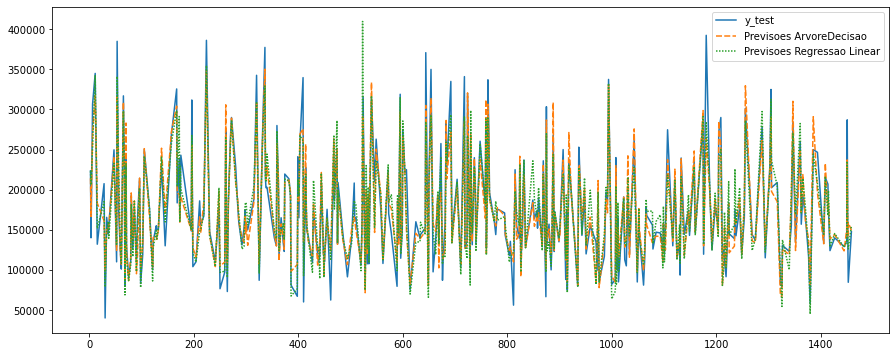

In [27]:
plt.figure(figsize=(15,6))#aumenta o tamanho do grafico
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [28]:
submission = pd.DataFrame(verification,columns=['Id','SalesPricePredict'])
submission

,Id,SalesPricePredict
0,1461,126823.868464
1,1462,152424.870086
2,1463,175316.802651
3,1464,194234.681756
4,1465,253420.798002
...,...,...
1454,2915,74403.023799
1455,2916,72031.420507
1456,2917,172876.050301
1457,2918,111053.275316


In [29]:
submission = submission.rename(columns={'SalesPricePredict':'SalePrice'})

In [30]:
submission.to_csv("submission.csv",index=False)